<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project_20_Gold_Price_Prediction_Model/Project_20_Gold_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for data analysis and machine learning.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# Loading the gold price data from a CSV file into a pandas DataFrame.
gold = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# Displaying the first few rows of the DataFrame to get an initial look at the data.
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Getting Some basic informations about the data

In [ ]:
# Checking the dimensions (number of rows and columns) of the DataFrame.
gold.shape

(2290, 6)

In [ ]:
# Getting a concise summary of the DataFrame, including data types and non-null values.
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking for any missing values in each column of the DataFrame.
gold.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# Generating descriptive statistics of the numerical columns in the DataFrame.
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:

Positive Correlation

Negative Correlation

In [ ]:
# Dropping the 'Date' column and calculating the correlation matrix for numerical features.
gold_numeric = gold.drop('Date', axis=1)
correlation = gold_numeric.corr()

<Axes: >

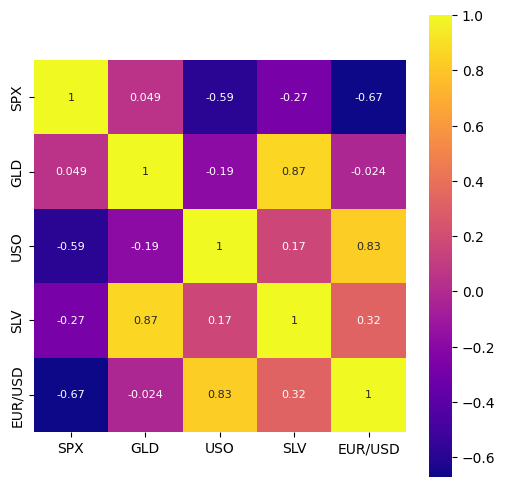

In [ ]:
# Creating a heatmap to visualize the correlation matrix between variables.
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='plasma')

In [ ]:
# Printing the correlation values of 'GLD' with other features.
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


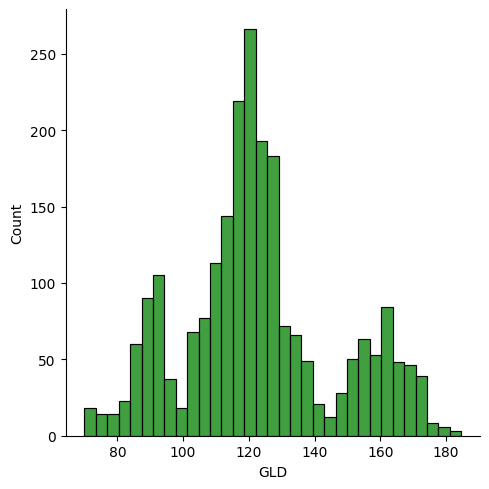

In [ ]:
# Visualizing the distribution of the 'GLD' price using a distribution plot.
sns.displot(gold['GLD'],color='green')

# Splitting the Features and Target

In [ ]:
# Separating features (X) and the target variable (Y) for model training.
X = gold.drop(['Date', 'GLD'],axis=1)
Y = gold['GLD']

In [ ]:
# Checking the shape of the target variable (Y).
Y.shape

(2290,)

# Training the model

In [ ]:
# Splitting the dataset into training and testing sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Initializing and training a RandomForestRegressor model with the training data.
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on the test set and printing the actual test values.
pred = reg.predict(X_test)
print(y_test)

2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
1872    126.680000
1075    167.179993
299      93.849998
306      96.230003
1132    154.339996
Name: GLD, Length: 458, dtype: float64
